In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
folder_path = r'C:\Users\arthur.oliveira\OneDrive\Study\Python-Data-Science\Data Analysis\Databases\Games\Video_Games.csv'
df = pd.read_csv(folder_path)

In [ ]:
df.head(10)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [65]:
# Noticed that this column had non numeric values, so I had to adjust to convert column type 
df['User_Score'].value_counts()

User_Score
tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [69]:
# Inplace will not work in pandas 3.0
df['User_Score'] = df['User_Score'].replace('tbd',np.nan)

In [71]:
# 'tbd' values removed
df['User_Score'].value_counts()

User_Score
7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: count, Length: 95, dtype: int64

In [73]:
# Convert User_Score to type float
df['User_Score'] = df['User_Score'].astype(float)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [80]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [81]:
df['Rating'].value_counts()

Rating
E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [82]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [83]:
# Counting null values
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [84]:
df = df.dropna(subset=['Name', 'Year_of_Release'])
# df.dropna(subset=['Name', 'Year_of_Release'], inplace=True)

In [86]:
# Counting null values
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8465
Critic_Count       8465
User_Score         8985
User_Count         8985
Developer          6541
Rating             6679
dtype: int64

In [87]:
# Convert User_Score to type float
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  int32  
 3   Genre            16448 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       7463 non-null   float64
 13  User_Count       7463 non-null   float64
 14  Developer        9907 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(9), int32(1), object(6)
memory usage: 2.1+ MB


In [89]:
# See if there are non unique titles
df['Name'].value_counts()

Name
Need for Speed: Most Wanted               12
FIFA 14                                    9
LEGO Marvel Super Heroes                   9
Ratatouille                                9
Madden NFL 08                              8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: count, Length: 11429, dtype: int64

In [90]:
# Some games are available in multi platforms so it counts more than one in table 
df[df['Name']=='FIFA 14']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
126,FIFA 14,PS3,2013,Sports,Electronic Arts,0.78,4.24,0.07,1.37,6.47,86.0,37.0,4.3,576.0,EA Canada,E
271,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2.89,0.01,0.40,4.22,84.0,41.0,4.2,435.0,EA Canada,E
469,FIFA 14,PS4,2013,Sports,Electronic Arts,0.61,1.85,0.11,0.44,3.01,87.0,26.0,6.3,616.0,EA Canada,E
1753,FIFA 14,XOne,2013,Sports,Electronic Arts,0.41,0.66,0.00,0.09,1.16,88.0,22.0,5.8,328.0,EA Canada,E
4699,FIFA 14,PSV,2013,Sports,Electronic Arts,0.08,0.23,0.01,0.09,0.41,NaN,NaN,1.8,69.0,EA Canada,E
4809,FIFA 14,PC,2013,Sports,Electronic Arts,0.01,0.36,0.00,0.03,0.40,87.0,6.0,4.6,441.0,EA Canada,E
4985,FIFA 14,Wii,2013,Sports,Electronic Arts,0.00,0.36,0.00,0.02,0.38,NaN,NaN,4.3,19.0,EA Canada,E
6872,FIFA 14,3DS,2013,Sports,Electronic Arts,0.00,0.22,0.00,0.01,0.24,NaN,NaN,NaN,NaN,NaN,NaN
7876,FIFA 14,PSP,2013,Sports,Electronic Arts,0.00,0.15,0.00,0.04,0.19,NaN,NaN,3.4,23.0,EA Canada,E


XBOX 360 DF

In [130]:
df_xbox360 = df.loc[df['Platform'] == 'X360']

In [131]:
df_xbox360.reset_index().head(5)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
1,23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
2,29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
3,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M
4,35,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M


In [135]:
df_xbox360.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1232 entries, 14 to 16715
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1232 non-null   object 
 1   Platform         1232 non-null   object 
 2   Year_of_Release  1232 non-null   int32  
 3   Genre            1232 non-null   object 
 4   Publisher        1232 non-null   object 
 5   NA_Sales         1232 non-null   float64
 6   EU_Sales         1232 non-null   float64
 7   JP_Sales         1232 non-null   float64
 8   Other_Sales      1232 non-null   float64
 9   Global_Sales     1232 non-null   float64
 10  Critic_Score     894 non-null    float64
 11  Critic_Count     894 non-null    float64
 12  User_Score       945 non-null    float64
 13  User_Count       945 non-null    float64
 14  Developer        1035 non-null   object 
 15  Rating           1030 non-null   object 
dtypes: float64(9), int32(1), object(6)
memory usage: 158.8+ KB


In [139]:
df_xbox360.describe().round(2)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,894.00,894.00,945.00,945.00
mean,2009.88,0.48,0.22,0.01,0.07,0.78,68.69,42.25,6.68,189.86
std,2.46,1.04,0.48,0.02,0.14,1.63,15.09,22.88,1.44,520.02
min,2005.00,0.00,0.00,0.00,0.00,0.01,19.00,3.00,0.70,4.00
25%,2008.00,0.08,0.01,0.00,0.01,0.11,59.00,24.00,5.90,19.00
50%,2010.00,0.18,0.05,0.00,0.02,0.28,71.00,42.00,7.00,48.00
75%,2011.00,0.46,0.22,0.01,0.07,0.77,80.00,59.00,7.80,134.00
max,2016.00,15.00,5.14,0.24,1.69,21.81,98.00,100.00,9.00,8713.00


In [133]:
df_xbox360['Name'].value_counts()

Name
Need for Speed: Most Wanted                                    2
Kinect Adventures!                                             1
World Series of Poker: Tournament of Champions 2007 Edition    1
Sherlock Holmes vs. Jack the Ripper                            1
Amped 3                                                        1
                                                              ..
Dragon Age: Inquisition                                        1
LEGO Dimensions                                                1
NHL 14                                                         1
Two Worlds II                                                  1
LMA Manager 2007                                               1
Name: count, Length: 1231, dtype: int64

In [134]:
# Discoreving why Need for speed has 2 appearences
df_xbox360.loc[df['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T


In [146]:
xbox360_developers = df_xbox360['Developer'].value_counts()

In [147]:
type(xbox360_developers)

pandas.core.series.Series

In [148]:
# xbox360_developers_df.loc[xbox360_developers_df.values >= 20]
xbox_top_ten_dev = xbox360_developers.nlargest(10)

In [149]:
xbox_top_ten_dev

Developer
EA Canada                 29
Ubisoft                   22
EA Tiburon                20
Ubisoft Montreal          20
Konami                    20
EA Sports                 18
Visual Concepts           17
Yuke's                    14
Omega Force               13
Harmonix Music Systems    13
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Xbox 360 Developers')

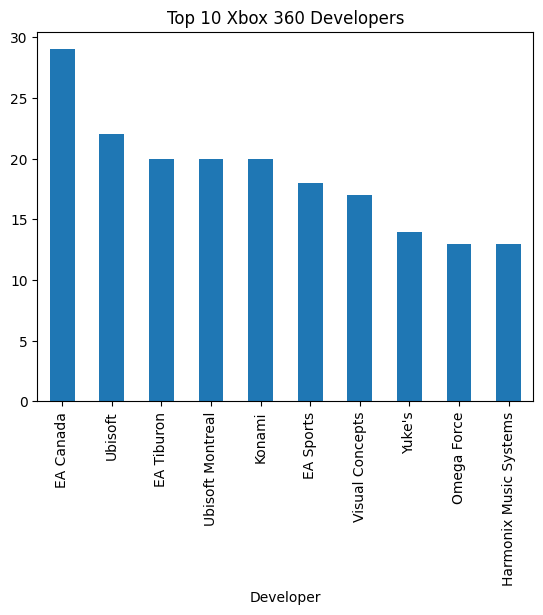

In [151]:
xbox_top_ten_dev.plot(kind='bar')
plt.title('Top 10 Xbox 360 Developers')

In [153]:
xboxdf_top_ten_UserScore = df_xbox360.dropna(subset=['User_Score'])

In [160]:
xboxdf_top_ten_UserScore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 14 to 16658
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             945 non-null    object 
 1   Platform         945 non-null    object 
 2   Year_of_Release  945 non-null    int32  
 3   Genre            945 non-null    object 
 4   Publisher        945 non-null    object 
 5   NA_Sales         945 non-null    float64
 6   EU_Sales         945 non-null    float64
 7   JP_Sales         945 non-null    float64
 8   Other_Sales      945 non-null    float64
 9   Global_Sales     945 non-null    float64
 10  Critic_Score     861 non-null    float64
 11  Critic_Count     861 non-null    float64
 12  User_Score       945 non-null    float64
 13  User_Count       945 non-null    float64
 14  Developer        942 non-null    object 
 15  Rating           939 non-null    object 
dtypes: float64(9), int32(1), object(6)
memory usage: 121.8+ KB


In [161]:
xboxdf_top_ten_UserScore.isnull().sum()

Name                0
Platform            0
Year_of_Release     0
Genre               0
Publisher           0
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score       84
Critic_Count       84
User_Score          0
User_Count          0
Developer           3
Rating              6
dtype: int64

In [169]:
a = df_xbox360.loc[df_xbox360['User_Score'] >= 8]

In [181]:
a['User_Score'].value_counts().sort_index(ascending=False)

User_Score
9.0     2
8.9     4
8.8     6
8.7    10
8.6    12
8.5    12
8.4    20
8.3    24
8.2    28
8.1    27
8.0    29
Name: count, dtype: int64

In [96]:
# VER VALORES UNICOS 
valores_unicos = df['Genre'].unique()

print(valores_unicos)


['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [97]:
# VER VALORES UNICOS 
valores_unicos2 = df['Platform'].unique()

print(valores_unicos2)


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [98]:
contagem = df['Platform'].value_counts()

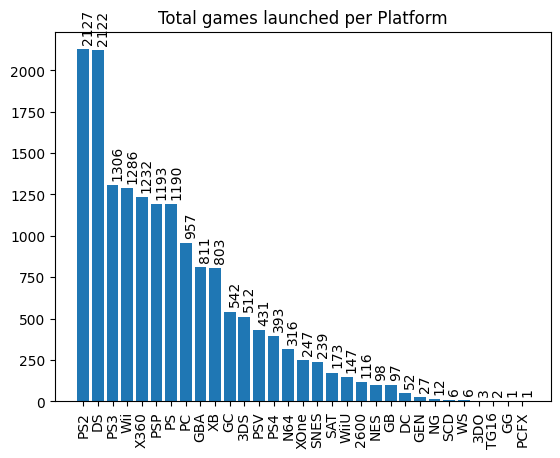

In [99]:
fig, ax = plt.subplots()
contagem = df['Platform'].value_counts()
bars = ax.bar(contagem.index, contagem.values)

ax.set_title('Total games launched per Platform')
plt.xticks(rotation=90)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/3, yval+30, int(yval), va='bottom', rotation=90) # va: vertical alignment

plt.show()

In [100]:
df2= df.query('2000 <= Year_of_Release <= 2015')
df2  = df2.head(100)

In [101]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [102]:
df2_group_year = df2.groupby(['Year_of_Release'])[['NA_Sales','EU_Sales','Other_Sales','Global_Sales','JP_Sales']].sum()

In [103]:
df2_group_year.head()

,NA_Sales,EU_Sales,Other_Sales,Global_Sales,JP_Sales
Year_of_Release,,,,,
2001,26.14,14.01,3.08,49.63,6.37
2002,17.40,12.14,3.27,38.83,6.02
2003,7.39,4.60,1.21,14.15,0.95
2004,31.32,10.68,20.59,68.65,6.04
2005,33.99,41.98,11.07,109.76,22.71


In [104]:
df2_group_year.shape

(15, 5)

In [105]:
df2.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [106]:
region = ['NA_Sales','Global_Sales','JP_Sales','EU_Sales']

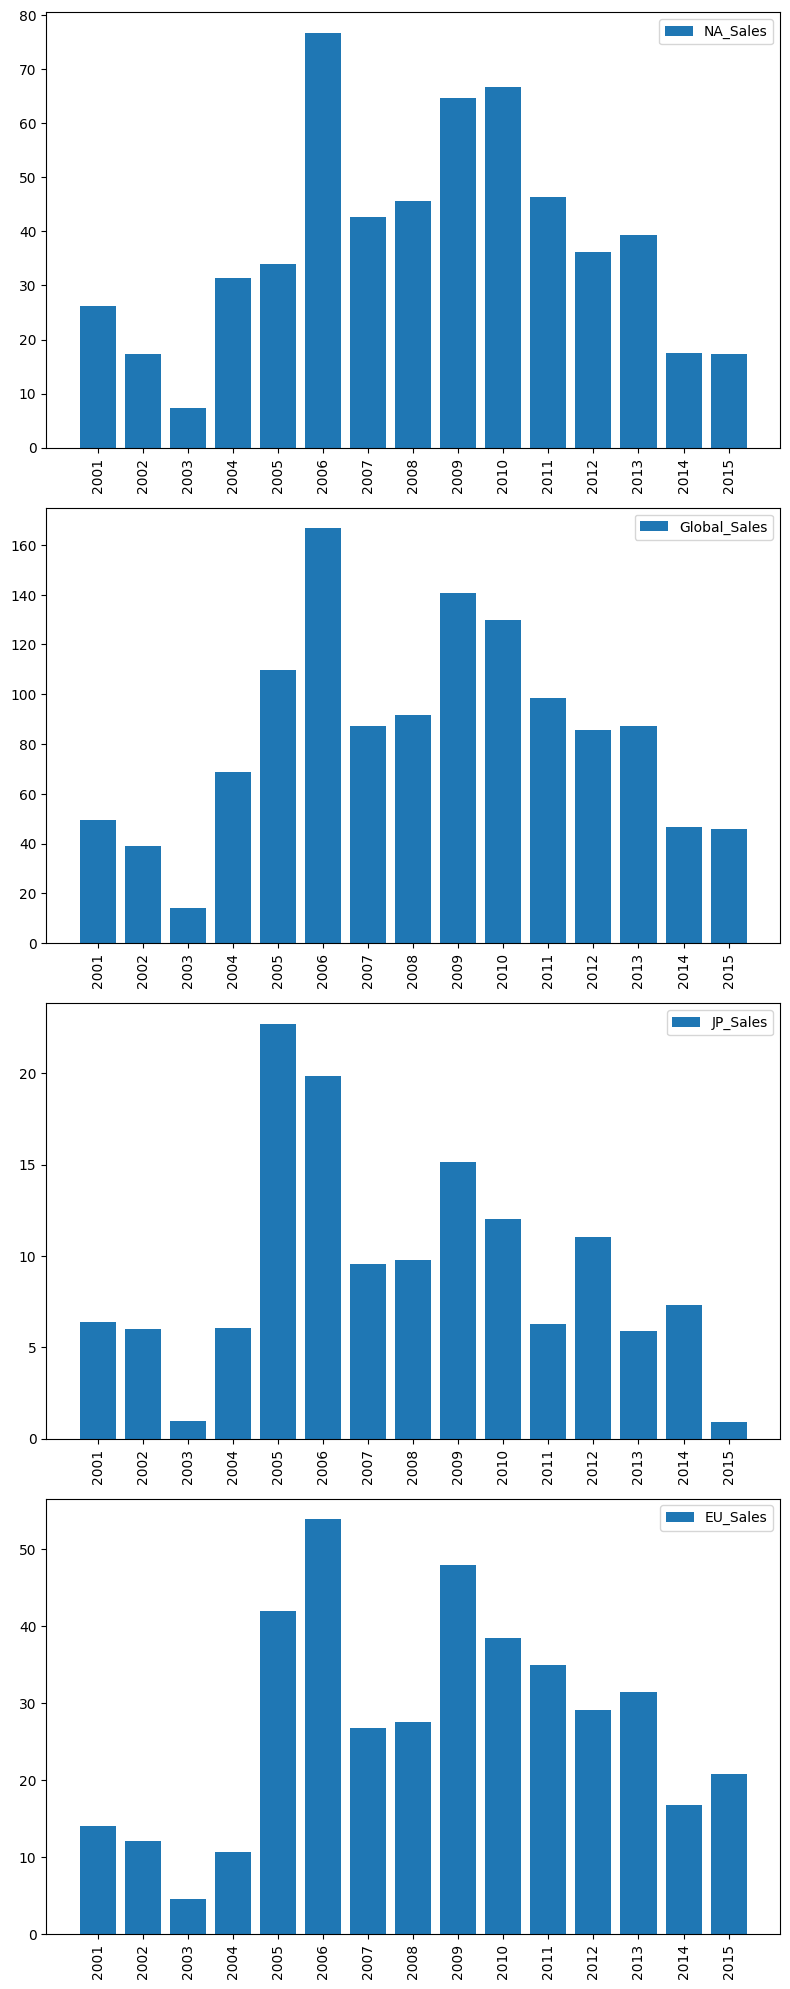

In [107]:
fig, axs = plt.subplots(len(region), figsize=(8, 5*len(region)))

for i, reg in enumerate(region):
    #plota grafico
    axs[i].bar(df2_group_year.index, df2_group_year[reg], label=reg)

    #altera eixo x
    axs[i].set_xticks(df2_group_year.index)
    axs[i].set_xticklabels(df2_group_year.index, rotation=90)

    #adiciona legenda
    axs[i].legend([reg])

plt.tight_layout()
plt.show()

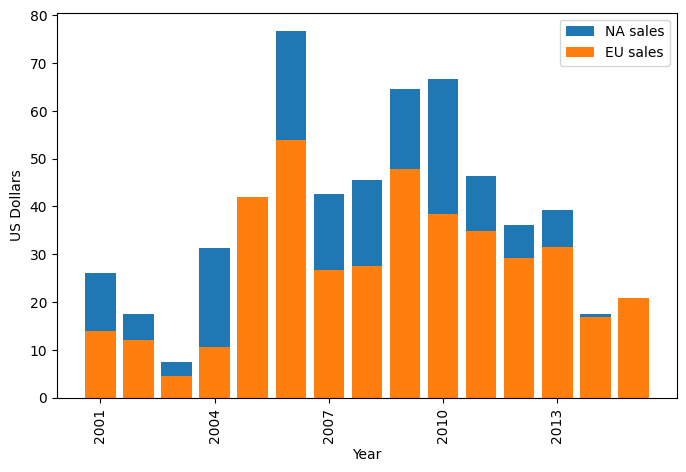

In [46]:
#plota como figura, adiciona dimensoes para a plotagem
plt.figure(figsize=(8,5))

#plota grafico
plt.bar(df2_group_year.index, df2_group_year.NA_Sales, label='NA sales')
plt.bar(df2_group_year.index, df2_group_year.EU_Sales, label='EU sales')

#altera eixo x
plt.xticks(df2_group_year.index[::3],rotation=90)

# Adiciona titulo aos eixos
plt.xlabel('Year')
plt.ylabel('US Dollars')

#adiciona legenda
plt.legend()


In [36]:
df2_group_year.index[::3]

Index([2001.0, 2004.0, 2007.0, 2010.0, 2013.0], dtype='float64', name='Year_of_Release')

In [117]:
df2_group_year

,NA_Sales,EU_Sales,Other_Sales,Global_Sales,JP_Sales
Year_of_Release,,,,,
2001,26.14,14.01,3.08,49.63,6.37
2002,17.40,12.14,3.27,38.83,6.02
2003,7.39,4.60,1.21,14.15,0.95
2004,31.32,10.68,20.59,68.65,6.04
2005,33.99,41.98,11.07,109.76,22.71
2006,76.72,53.88,16.21,166.65,19.84
2007,42.70,26.76,8.32,87.33,9.56
2008,45.54,27.57,8.81,91.72,9.78
2009,64.65,47.91,12.91,140.59,15.14
